In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
import statistics as st

In [227]:
data = pd.read_csv('Bank Loan.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [3]:
# seperating data types

def seprate_data_types(data):
    categorical = []
    continuous = []
    for column in data.columns:                
        if data[column].nunique() < 50:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(data)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [4]:
# checking for null values

data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [5]:
# info for categorical data

def info_of_cat(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") 
    print(f"Mode of {col} is {data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {data[col].isnull().sum()}") 
    if data[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")

In [6]:
# info for continous data

def info_num(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")

In [7]:
info_num('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in the AMT_GOODS_PRICE is 81


In [8]:
# imputing missing values

data['AMT_GOODS_PRICE'].fillna((data['AMT_GOODS_PRICE'].mean()),inplace=True)

In [9]:
info_of_cat('NAME_TYPE_SUITE')

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405

There are null values in the NAME_TYPE_SUITE column


In [10]:
data['NAME_TYPE_SUITE'].fillna((data['NAME_TYPE_SUITE'].mode()[0]),inplace=True)

In [11]:
# imputing missing values

info_of_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224

There are null values in the OCCUPATION_TYPE column


In [12]:
# imputing missing values

data['OCCUPATION_TYPE'].fillna((data['OCCUPATION_TYPE'].mode()[0]),inplace=True)

In [226]:
data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

### TARGET

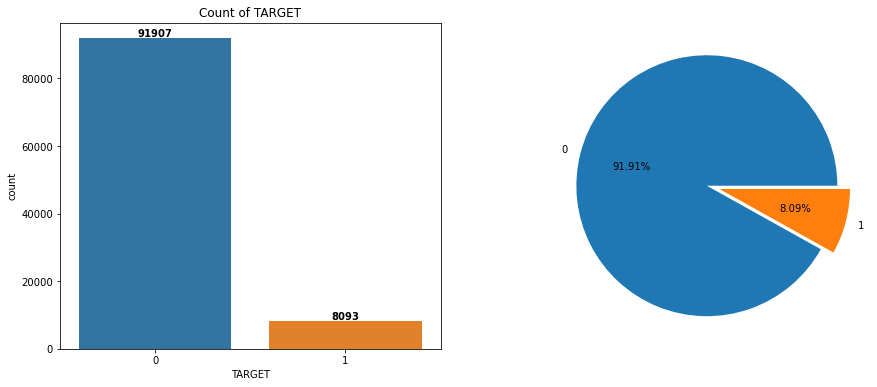

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(x = data['TARGET'], data = data,order = data['TARGET'].value_counts().index, ax = ax[0]).set(title='Count of TARGET')
for i in ax[0].patches:
    x=i.get_x()+i.get_width()/2
    y=i.get_height()
    ax[0].annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
percentage = data['TARGET'].value_counts()         
labels = list(data['TARGET'].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%",explode=[0,0.1]);

8% of the total applicants have defaulted atleast once in their payment of their monthly installments.

### CONTRACT TYPE

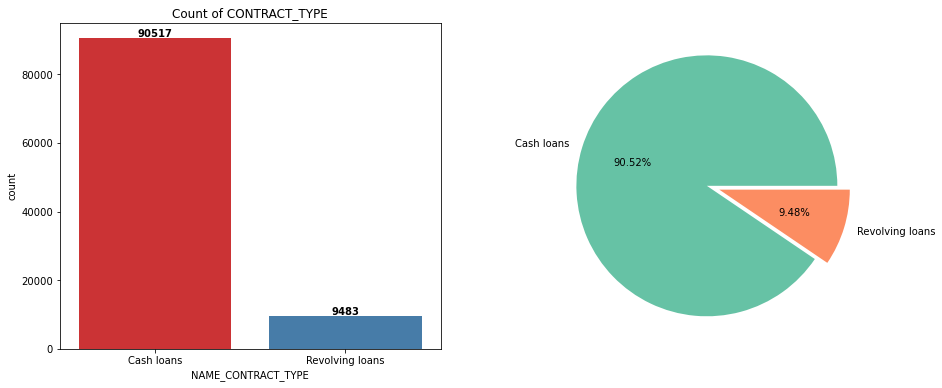

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(x = data['NAME_CONTRACT_TYPE'],palette='Set1', data = data,order = data['NAME_CONTRACT_TYPE'].value_counts().index, ax = ax[0]).set(title='Count of CONTRACT_TYPE')
for i in ax[0].patches:
    x=i.get_x()+i.get_width()/2
    y=i.get_height()
    ax[0].annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
colors = sns.color_palette('Set2')
percentage = data['NAME_CONTRACT_TYPE'].value_counts()         
labels = list(data['NAME_CONTRACT_TYPE'].value_counts().index) 
plt.pie(percentage,labels = labels,colors=colors, autopct= "%0.2f%%",explode=[0,0.1]);

90 % of the applicants applied for cash loans

### GENDER

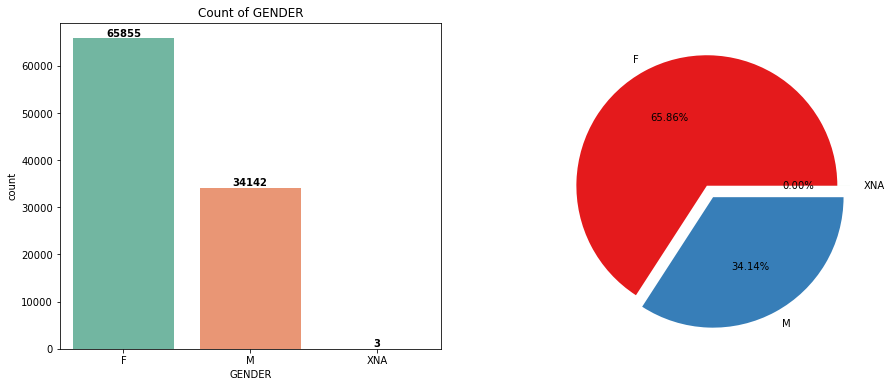

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.countplot(x = data['GENDER'],palette='Set2', data = data,order = data['GENDER'].value_counts().index, ax = ax[0]).set(title='Count of GENDER')
for i in ax[0].patches:
    x=i.get_x()+i.get_width()/2
    y=i.get_height()
    ax[0].annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
colors = sns.color_palette('Set1')
percentage = data['GENDER'].value_counts()         
labels = list(data['GENDER'].value_counts().index) 
plt.pie(percentage,labels = labels,colors=colors, autopct= "%0.2f%%",explode=[0,0.1,0.1]);

65 % percent of the applicants are females

### CARS

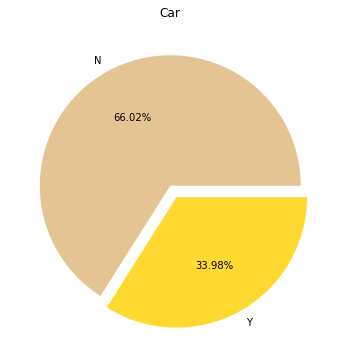

In [17]:
plt.figure(figsize=(10,6))
plt.title('Car')
percentage = data['Car'].value_counts()  
colors = sns.color_palette('Set2_r')
labels = list(data['Car'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

atleast 66 % percent of the applicants doesnt have a car

### HOUSE

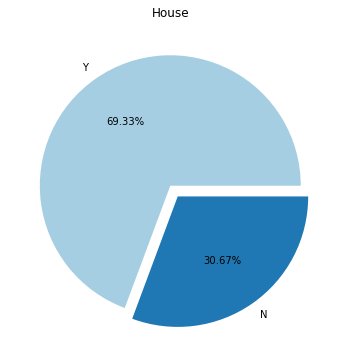

In [18]:
plt.figure(figsize=(10,6))
plt.title('House')
percentage = data['House'].value_counts()  
colors = sns.color_palette('Paired')
labels = list(data['House'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

69 % of applicants have a house

### CHILDREN

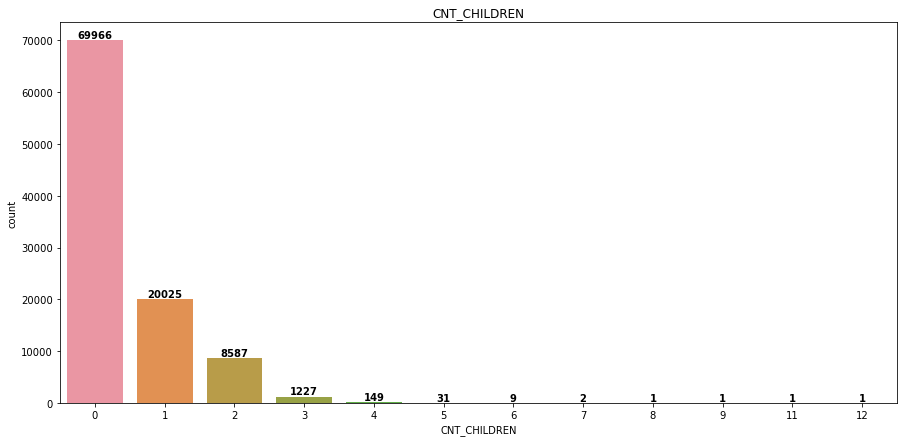

In [19]:
fig, ax = plt.subplots(figsize = (15, 7))
at_count=data['CNT_CHILDREN'].value_counts()
label=list(data['CNT_CHILDREN'].value_counts().index)
sns.countplot(x = data['CNT_CHILDREN'],data=data,order=data['CNT_CHILDREN'].value_counts().index)
for p in ax.patches:
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.title('CNT_CHILDREN')
plt.show()

Most of the applicants dont have children

### NAME_TYPE_SUITE

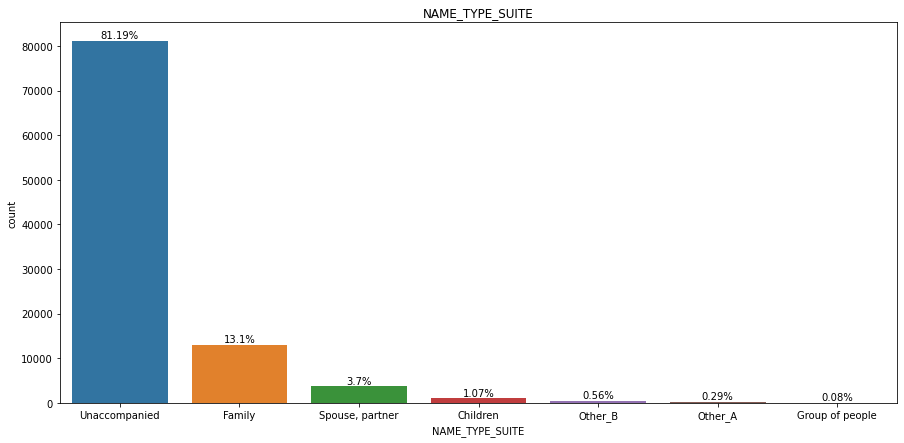

In [20]:
def bar_percentage(ax, count: "NAME_TYPE_SUITE "):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 7))
at_count=data['NAME_TYPE_SUITE'].value_counts()
label=list(data['NAME_TYPE_SUITE'].value_counts().index)
sns.countplot(x = data['NAME_TYPE_SUITE'],data=data,order=data['NAME_TYPE_SUITE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_TYPE_SUITE')
plt.show()

81 % applicants didnt have company when they applied the loan

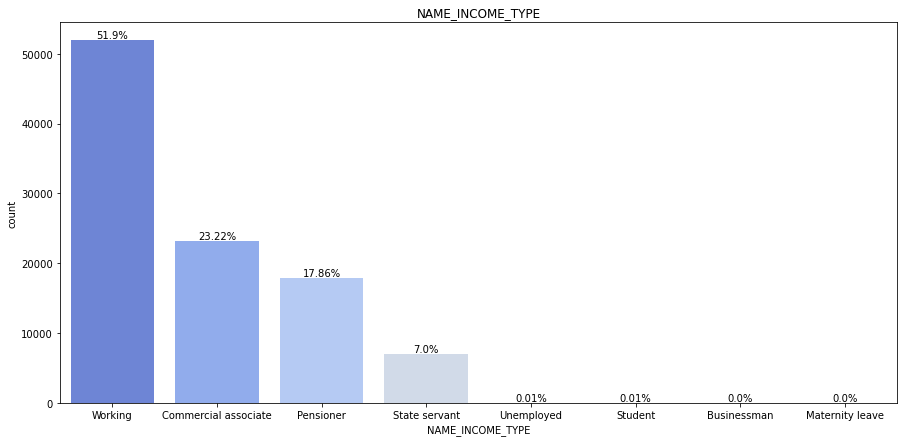

In [21]:
def bar_percentage(ax, count: "NAME_INCOME_TYPE "):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 7))
at_count=data['NAME_INCOME_TYPE'].value_counts()
label=list(data['NAME_INCOME_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_INCOME_TYPE'],palette='coolwarm',data=data,order=data['NAME_INCOME_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_INCOME_TYPE')
plt.show()

51 % of the applicants are working

### NAME_EDUCATION_TYPE

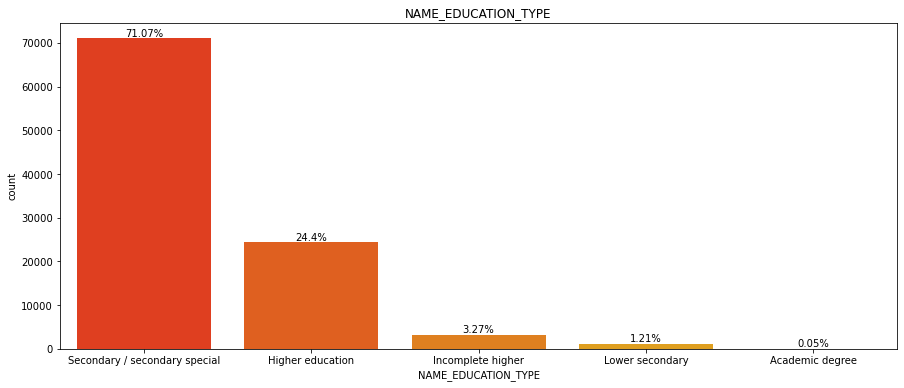

In [22]:
def bar_percentage(ax, count: "NAME_EDUCATION_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_EDUCATION_TYPE'].value_counts()
label=list(data['NAME_EDUCATION_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_EDUCATION_TYPE'],palette='autumn',data=data,order=data['NAME_EDUCATION_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_EDUCATION_TYPE')
plt.show()

71 % percent of the applicants have a secondary level eduaction

### NAME_FAMILY_STATUS

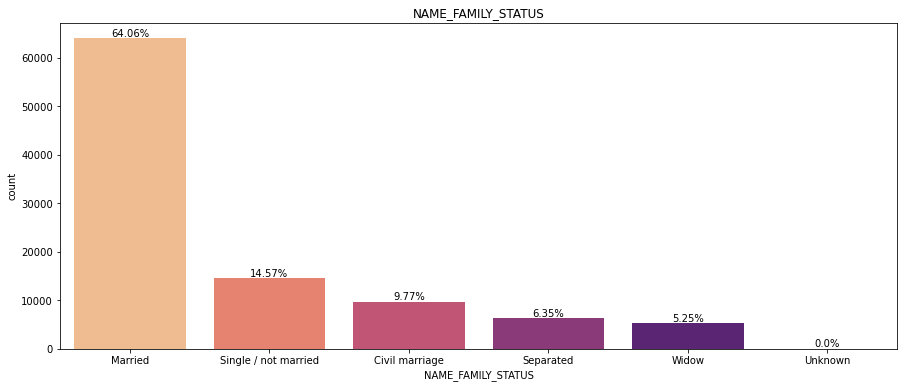

In [23]:
def bar_percentage(ax, count: "NAME_FAMILY_STATUS"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_FAMILY_STATUS'].value_counts()
label=list(data['NAME_FAMILY_STATUS'].value_counts().index)
sns.countplot(x = data['NAME_FAMILY_STATUS'],palette='magma_r',data=data,order=data['NAME_FAMILY_STATUS'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_FAMILY_STATUS')
plt.show()

64 % of applicants are married

### MOBILE

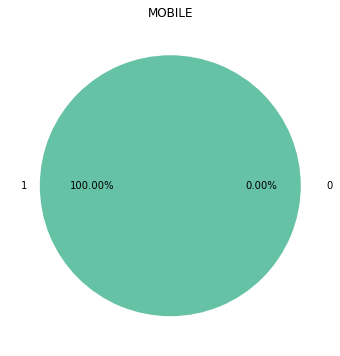

In [24]:
plt.figure(figsize=(10,6))
plt.title('MOBILE')
percentage = data['MOBILE'].value_counts()  
colors = sns.color_palette('Set2')
labels = list(data['MOBILE'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

All applicants have a mobile

### WORK_PHONE

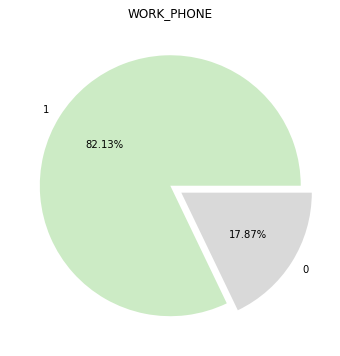

In [25]:
plt.figure(figsize=(10,6))
plt.title('WORK_PHONE')
percentage = data['WORK_PHONE'].value_counts()  
colors = sns.color_palette('Set3_r')
labels = list(data['WORK_PHONE'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

82 % of the applicants have a work phone

### HOME_PHONE

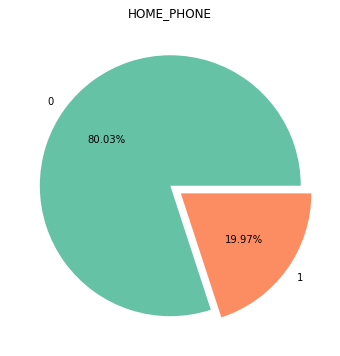

In [26]:
plt.figure(figsize=(10,6))
plt.title('HOME_PHONE')
percentage = data['HOME_PHONE'].value_counts()  
colors = sns.color_palette('Set2')
labels = list(data['HOME_PHONE'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

80 % of applicants have a home phone

### MOBILE_REACHABLE

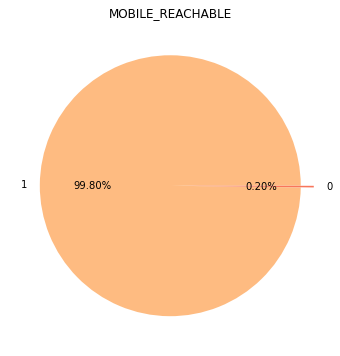

In [27]:
plt.figure(figsize=(10,6))
plt.title('MOBILE_REACHABLE')
percentage = data['MOBILE_REACHABLE'].value_counts()  
colors = sns.color_palette('magma_r')
labels = list(data['MOBILE_REACHABLE'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

almost all of the applicants mobile phones are reachable

### FLAG_EMAIL

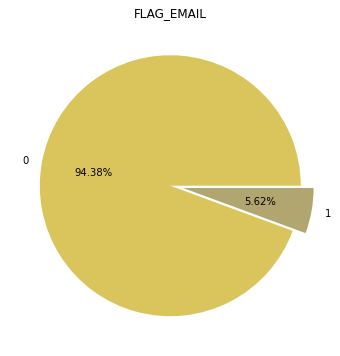

In [28]:
plt.figure(figsize=(10,6))
plt.title('FLAG_EMAIL')
percentage = data['FLAG_EMAIL'].value_counts()  
colors = sns.color_palette('cividis_r')
labels = list(data['FLAG_EMAIL'].value_counts().index) 
plt.pie(percentage,labels = labels, colors=colors,autopct= "%0.2f%%",explode=[0,0.1]);

94 % of the applicants have a email

### OCCUPATION_TYPE

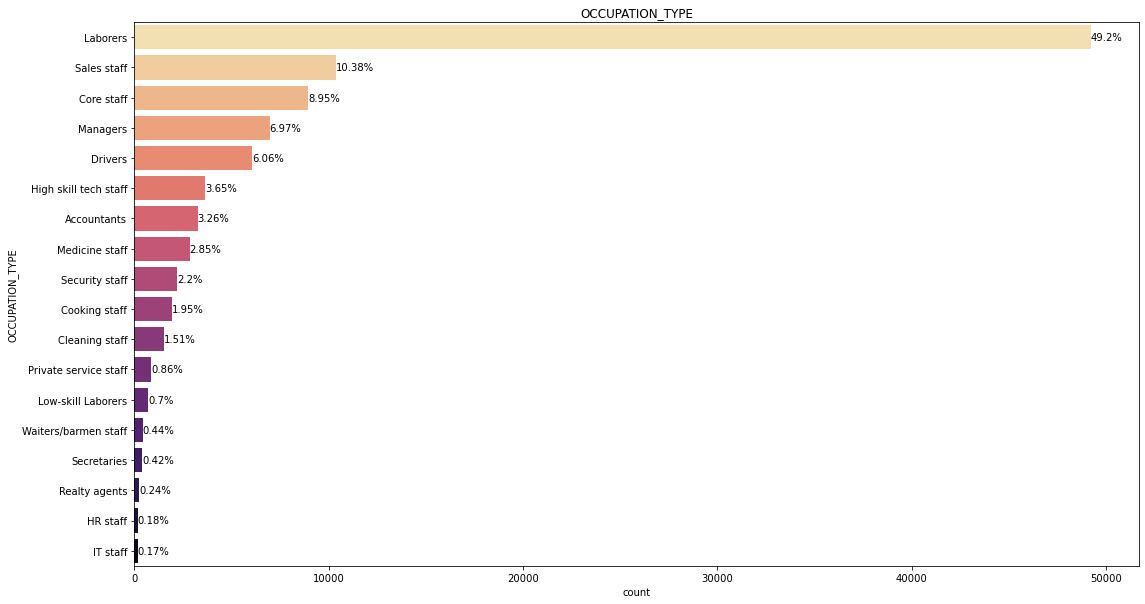

In [29]:
def bar_percentage(ax, count: "CNT_FAM_MEMBERS"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_width() / count) *100, 2)}%"
            y = bar.get_y() + bar.get_height() /2
            x = bar.get_width()
            ax.annotate(percentage, (x, y), va = "center")
fig, ax = plt.subplots(figsize = (18, 10))
at_count=data['OCCUPATION_TYPE'].value_counts()
label=list(data['OCCUPATION_TYPE'].value_counts().index)
sns.countplot(y = data['OCCUPATION_TYPE'],orient='v',palette='magma_r',data=data,order=data['OCCUPATION_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('OCCUPATION_TYPE')
plt.show()

we can infer that most of the 49 % applicants are laborers

### CNT_FAM_MEMBERS

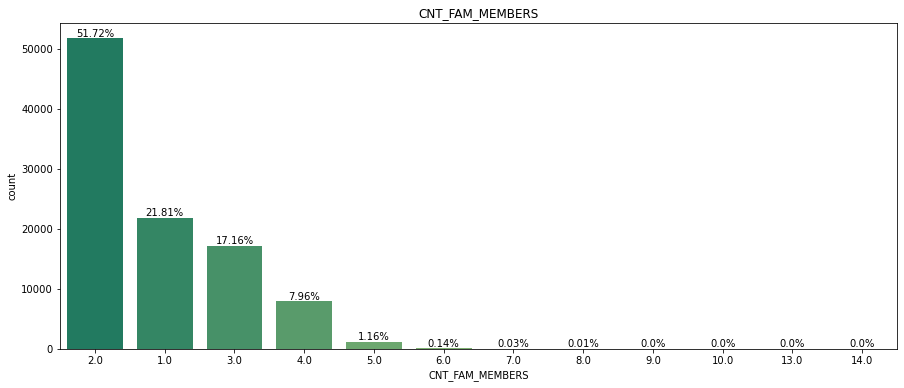

In [30]:
def bar_percentage(ax, count: "CNT_FAM_MEMBERS"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['CNT_FAM_MEMBERS'].value_counts()
label=list(data['CNT_FAM_MEMBERS'].value_counts().index)
sns.countplot(x = data['CNT_FAM_MEMBERS'],palette='summer',data=data,order=data['CNT_FAM_MEMBERS'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('CNT_FAM_MEMBERS')
plt.show()

51 % of applicants have 2 children

### APPLICATION_DAY

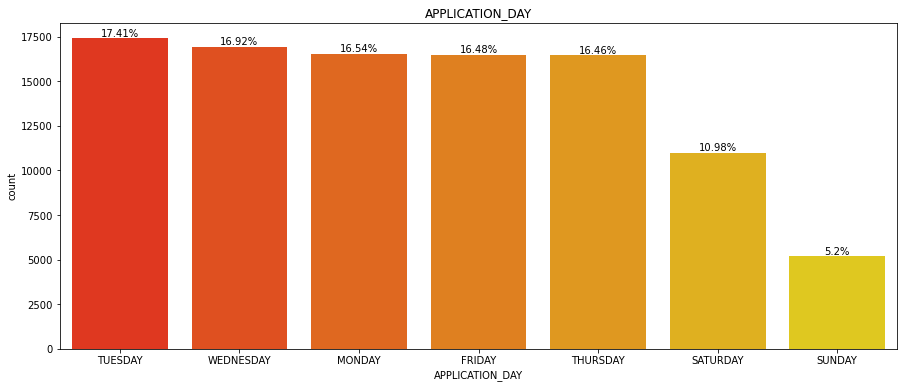

In [31]:
def bar_percentage(ax, count: "APPLICATION_DAY"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['APPLICATION_DAY'].value_counts()
label=list(data['APPLICATION_DAY'].value_counts().index)
sns.countplot(x = data['APPLICATION_DAY'],palette='autumn',data=data,order=data['APPLICATION_DAY'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('APPLICATION_DAY')
plt.show()

The applicants submitted the application during the bank's peak days

### TOTAL_DOC_SUBMITTED

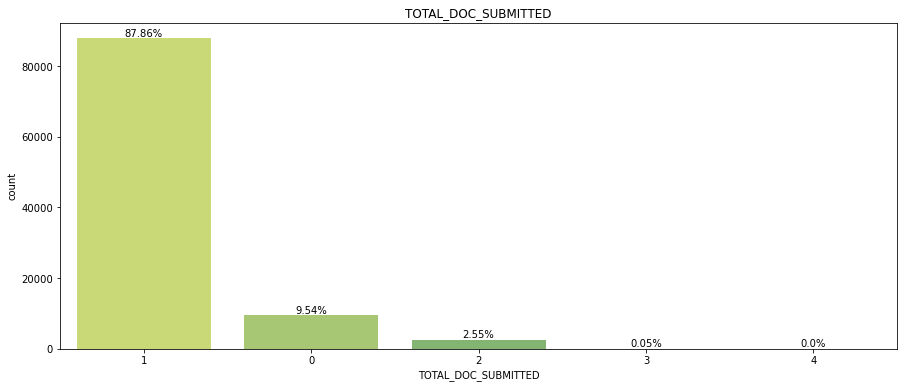

In [32]:

def bar_percentage(ax, count: "TOTAL_DOC_SUBMITTED"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['TOTAL_DOC_SUBMITTED'].value_counts()
label=list(data['TOTAL_DOC_SUBMITTED'].value_counts().index)
sns.countplot(x = data['TOTAL_DOC_SUBMITTED'],palette='summer_r',data=data,order=data['TOTAL_DOC_SUBMITTED'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('TOTAL_DOC_SUBMITTED')
plt.show()

87 % of the applicants submitted atleast 1 document

### AMT_INCOME_TOTAL

In [33]:
info_num('AMT_INCOME_TOTAL')

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in the AMT_INCOME_TOTAL is 0


In [231]:
# finding outliers

maxi = data['AMT_INCOME_TOTAL'].max()
print('Max ',maxi)
mini = data['AMT_INCOME_TOTAL'].min()
print('Min ',mini)
ran = maxi -mini
print('Range', ran)
Q1=data['AMT_INCOME_TOTAL'].quantile(0.25) 
Q3=data['AMT_INCOME_TOTAL'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  117000000.0
Min  25650.0
Range 116974350.0
IQR 90000.0
UF 337500.0
LF -22500.0


In [232]:
data['AMT_INCOME_TOTAL'].count()

100000

In [233]:
# outliers treatment

data.drop(data[(data['AMT_INCOME_TOTAL'] > 500000)].index, inplace=True)

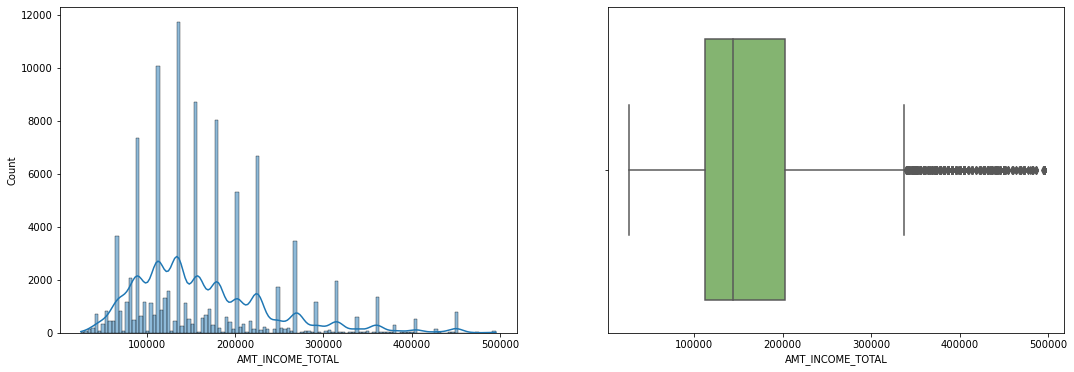

In [234]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_INCOME_TOTAL'],palette='summer', ax = ax[0],kde=True) 
sns.boxplot(x = data['AMT_INCOME_TOTAL'],palette='summer_r', ax = ax[1])
plt.show()

we can say that most of the applicants income is between 1 lakh and 2 lakh

### AMT_CREDIT

In [228]:
info_num('AMT_CREDIT')

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in the AMT_CREDIT is 0


In [229]:
# finding outliers

maxi = data['AMT_CREDIT'].max()
print('Max ',maxi)
mini = data['AMT_CREDIT'].min()
print('Min ',mini)
ran = maxi - mini
print('Range', ran)
Q1=data['AMT_CREDIT'].quantile(0.25) 
Q3=data['AMT_CREDIT'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  4050000.0
Min  45000.0
Range 4005000.0
IQR 538650.0
UF 1616625.0
LF -537975.0


In [230]:
data['AMT_CREDIT'].count()

100000

In [235]:
# outliers treatment

data.drop(data[(data['AMT_CREDIT'] > 2500000)].index, inplace=True)

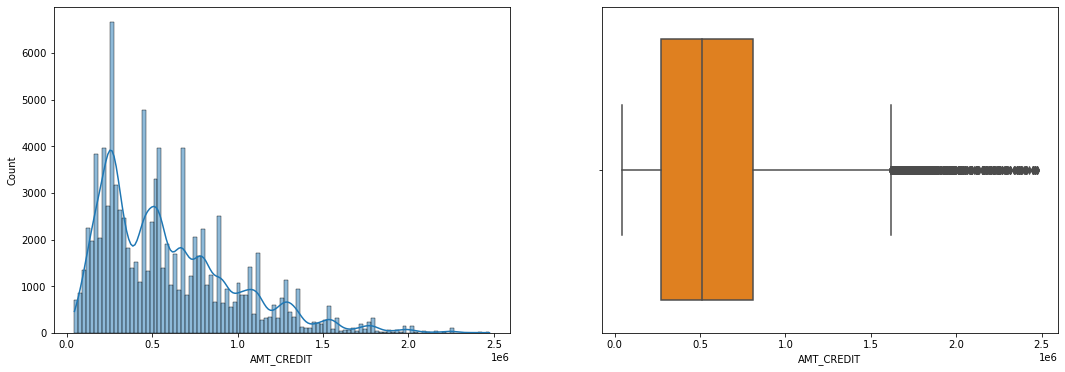

In [236]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_CREDIT'],palette='summer', ax = ax[0],kde=True) 
sns.boxplot(x = data['AMT_CREDIT'],palette='autumn', ax = ax[1])
plt.show()

Majority of the applicants have requested for a loan amount of around 200000 to 800000.

### AMT_GOODS_PRICE

In [41]:
info_num('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 499224.09645424795
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 225000.0
The standard deviation of the AMT_GOODS_PRICE is 315164.48935048934
Number of missing values in the AMT_GOODS_PRICE is 0


In [42]:
# finding outliers

maxi = data['AMT_GOODS_PRICE'].max()
print('Max ',maxi)
mini = data['AMT_GOODS_PRICE'].min()
print('Min ',mini)
ran = maxi - mini
print('Range', ran)
Q1=data['AMT_GOODS_PRICE'].quantile(0.25) 
Q3=data['AMT_GOODS_PRICE'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  1575000.0
Min  45000.0
Range 1530000.0
IQR 445500.0
UF 1343250.0
LF -438750.0


In [43]:
# outliers treatment

data.drop(data[(data['AMT_GOODS_PRICE'] > 1343250)].index, inplace=True)

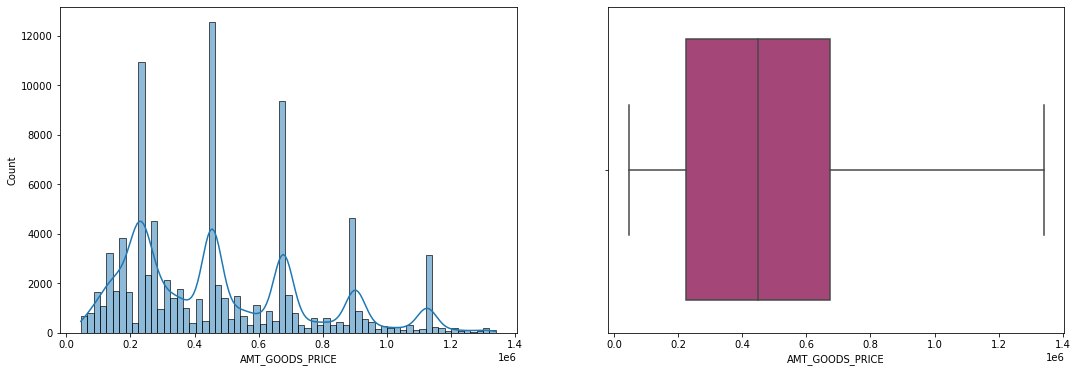

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_GOODS_PRICE'],palette='magma_r', ax = ax[0],kde=True) 
sns.boxplot(x = data['AMT_GOODS_PRICE'],palette='magma_r', ax = ax[1])
plt.show()

For consumer loans it is the price of the goods for which the loan is given around 200000 to 800000

### DAYS_EMPLOYED

In [45]:
info_num('DAYS_EMPLOYED')

The mean of the DAYS_EMPLOYED is 65507.46156449957
The median of the DAYS_EMPLOYED is -1180.0
The mode of the DAYS_EMPLOYED is 365243
The standard deviation of the DAYS_EMPLOYED is 142632.22482936305
Number of missing values in the DAYS_EMPLOYED is 0


In [46]:
# finding outliers

maxi = abs(data['DAYS_EMPLOYED']).max()
print('Max ',maxi)
mini = abs(data['DAYS_EMPLOYED']).min()
print('Min ',mini)
ran = maxi - mini
print('Range', ran)
Q1=abs(data['DAYS_EMPLOYED']).quantile(0.25) 
Q3=abs(data['DAYS_EMPLOYED']).quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  365243
Min  0
Range 365243
IQR 4944.0
UF 13280.0
LF -6496.0


In [47]:
# outliers treatment
data.drop(data[(abs(data['DAYS_EMPLOYED']) > 5759)].index, inplace=True)

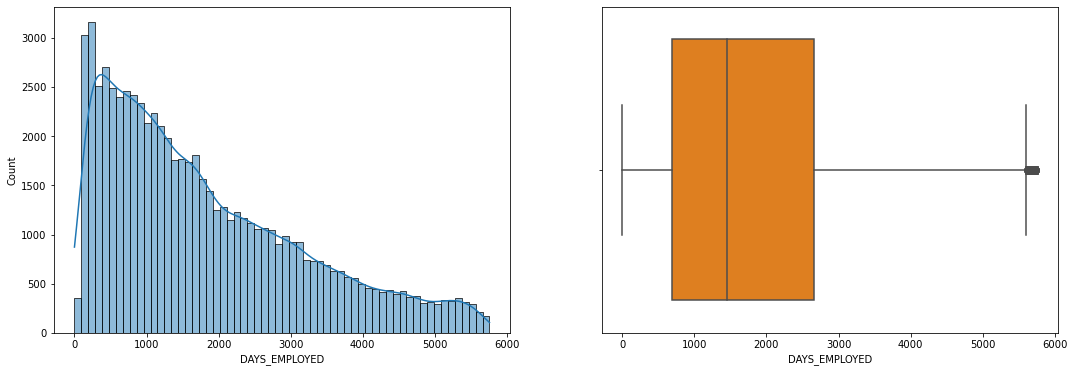

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = abs(data['DAYS_EMPLOYED']),palette='afmhot', ax = ax[0],kde=True) 
sns.boxplot(x = abs(data['DAYS_EMPLOYED']),palette='afmhot_r', ax = ax[1])
plt.show()

applicants are employed atleast for 1000 to 3000 days which is 3 to 8 years

### GENDER WISE TARGET

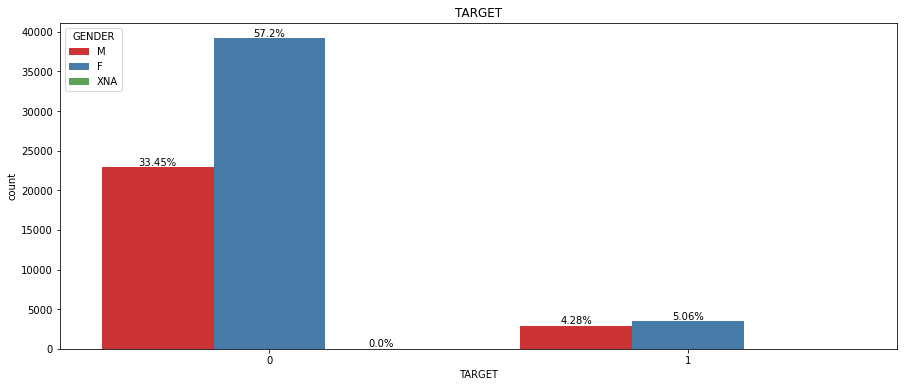

In [49]:
def bar_percentage(ax, count: "TARGET"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['TARGET'].value_counts()
label=list(data['TARGET'].value_counts().index)
sns.countplot(x = data['TARGET'],palette='Set1',hue='GENDER',data=data,order=data['TARGET'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('TARGET')
plt.show()

we can see that 5 % of females are defaulters and 4 % of males are defaulters

### GENDER WISE NAME_CONTRACT_TYPE

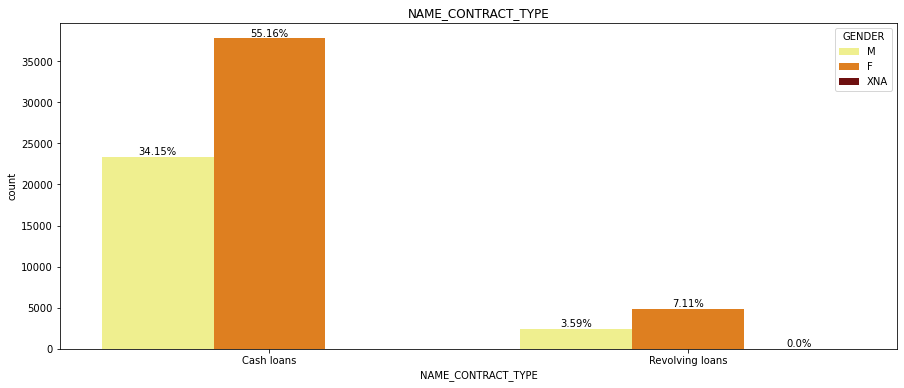

In [74]:
def bar_percentage(ax, count: "NAME_CONTRACT_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_CONTRACT_TYPE'].value_counts()
label=list(data['NAME_CONTRACT_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_CONTRACT_TYPE'],palette='afmhot_r',hue='GENDER',data=data,order=data['NAME_CONTRACT_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_CONTRACT_TYPE')
plt.show()

55 % of the applicants who applied for cash loans are females

### GENDER WISE CAR

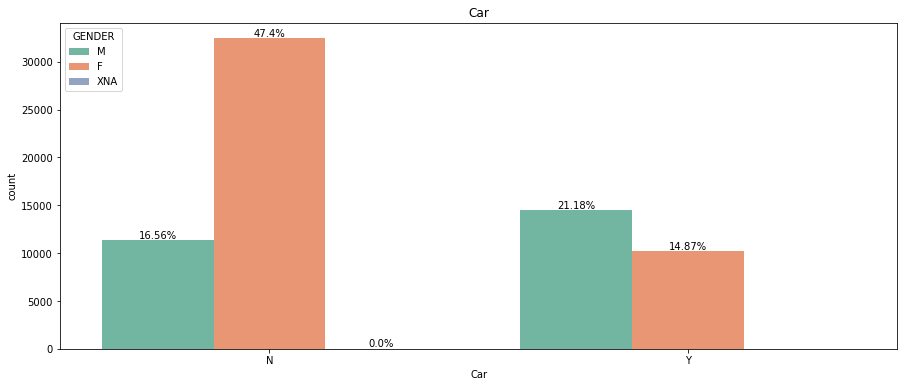

In [50]:
def bar_percentage(ax, count: "Car"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['Car'].value_counts()
label=list(data['Car'].value_counts().index)
sns.countplot(x = data['Car'],palette='Set2',hue='GENDER',data=data,order=data['Car'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('Car')
plt.show()

47 % applicants who doesnt own a car are females and 21 % applicants who own a car are females

### GENDER WISE HOUSE

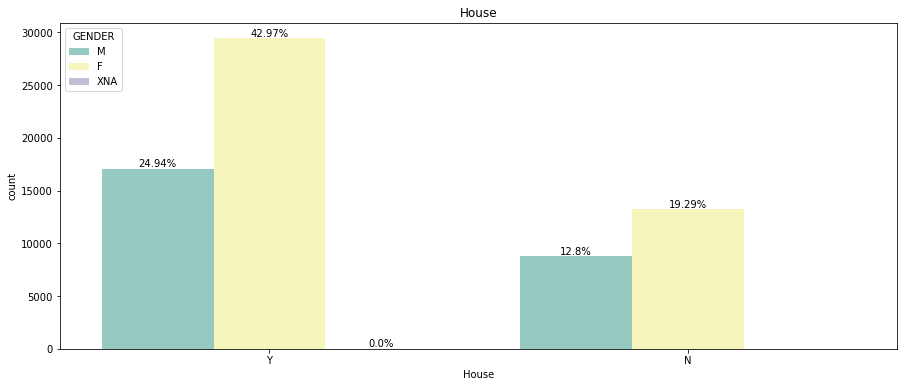

In [52]:
def bar_percentage(ax, count: "House"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['House'].value_counts()
label=list(data['House'].value_counts().index)
sns.countplot(x = data['House'],palette='Set3',hue='GENDER',data=data,order=data['House'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('House')
plt.show()

43 % of applicants who own a house are females and 20 % of applicants who didnt own a house are also females

### GENDER WISE INCOME TYPE

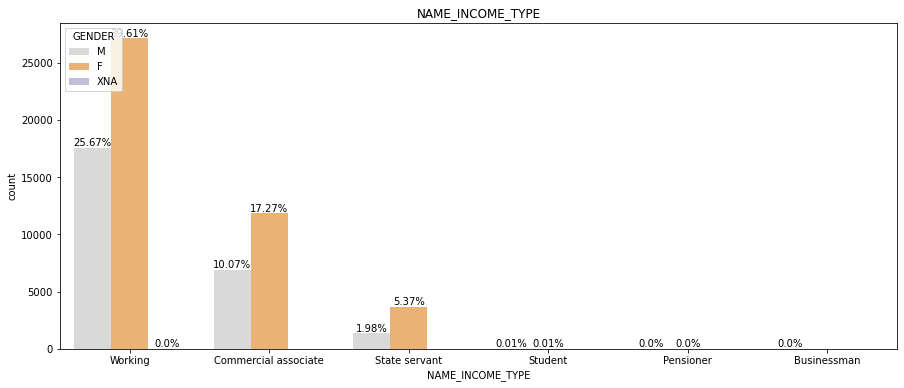

In [53]:
def bar_percentage(ax, count: "NAME_INCOME_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_INCOME_TYPE'].value_counts()
label=list(data['NAME_INCOME_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_INCOME_TYPE'],palette='Set3_r',hue='GENDER',data=data,order=data['NAME_INCOME_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_INCOME_TYPE')
plt.show()

we can see 40 % of applicants from working class are females 

### GENDER WISE EDUCATION TYPE

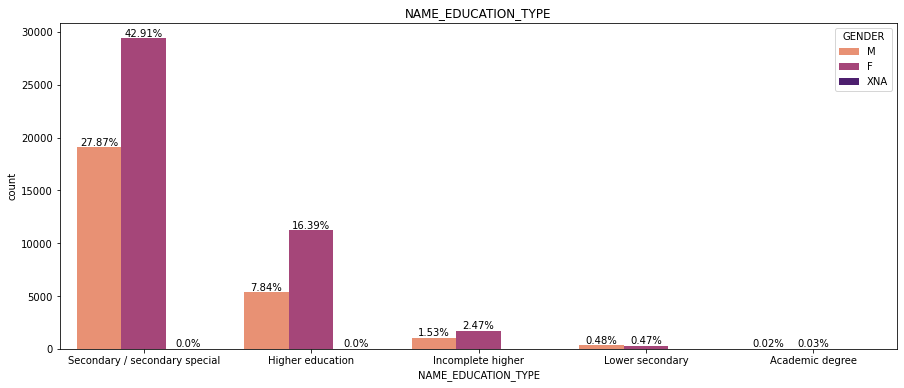

In [54]:

def bar_percentage(ax, count: "NAME_EDUCATION_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_EDUCATION_TYPE'].value_counts()
label=list(data['NAME_EDUCATION_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_EDUCATION_TYPE'],palette='magma_r',hue='GENDER',data=data,order=data['NAME_EDUCATION_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_EDUCATION_TYPE')
plt.show()

42.19 % of applicants who atleast have a secondary education are females

### GENDER WISE MARITAL STATUS

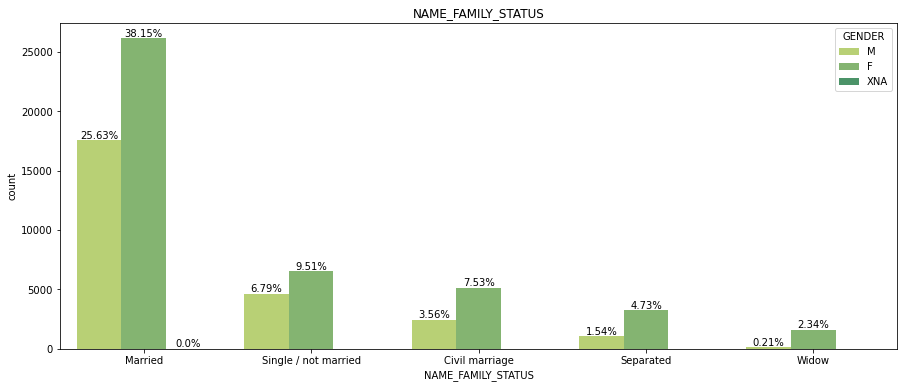

In [55]:
def bar_percentage(ax, count: "NAME_FAMILY_STATUS"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_FAMILY_STATUS'].value_counts()
label=list(data['NAME_FAMILY_STATUS'].value_counts().index)
sns.countplot(x = data['NAME_FAMILY_STATUS'],palette='summer_r',hue='GENDER',data=data,order=data['NAME_FAMILY_STATUS'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_FAMILY_STATUS')
plt.show()

38 % of applicants who are married are females

### GENDER WISE APPLICATION_DAY

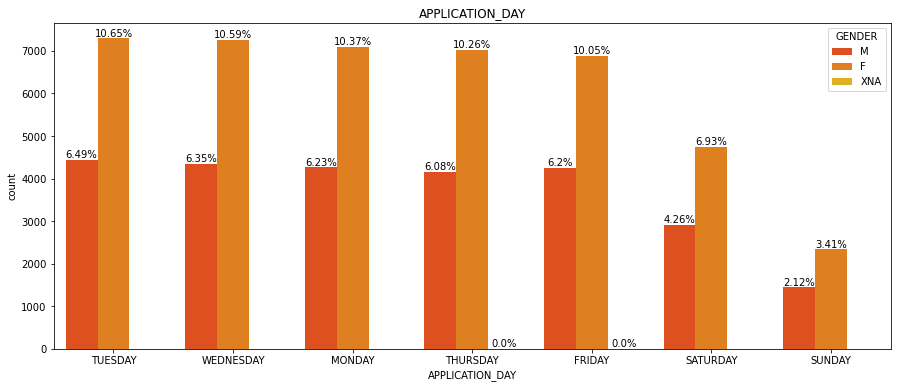

In [59]:
def bar_percentage(ax, count: "APPLICATION_DAY"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['APPLICATION_DAY'].value_counts()
label=list(data['APPLICATION_DAY'].value_counts().index)
sns.countplot(x = data['APPLICATION_DAY'],palette='autumn',hue='GENDER',data=data,order=data['APPLICATION_DAY'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('APPLICATION_DAY')
plt.show()

Gender doesnt play a role in the application day

### GENDER WISE INCOME

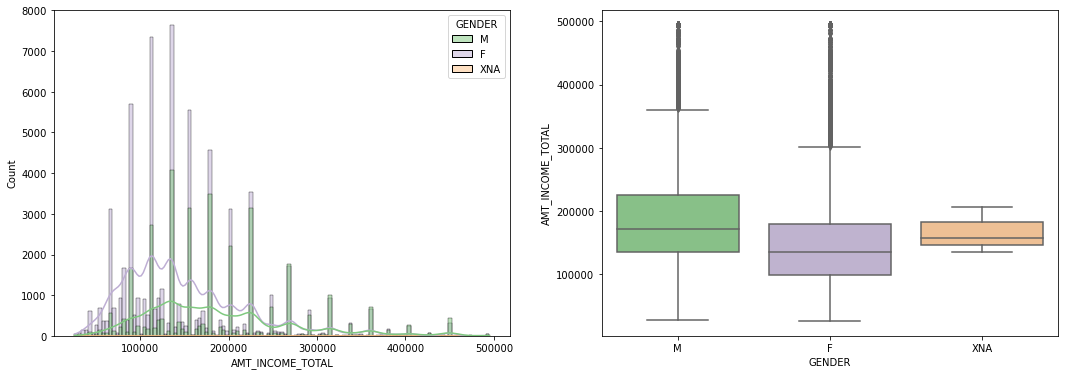

In [237]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_INCOME_TOTAL'],hue=data['GENDER'],palette='Accent', ax = ax[0],kde=True) 
sns.boxplot(y = data['AMT_INCOME_TOTAL'],x=data['GENDER'],palette='Accent', ax = ax[1])
plt.show()

we can see here that average income for male is around 160000 and females is for 140000

### GENDER WISE AMOUNT

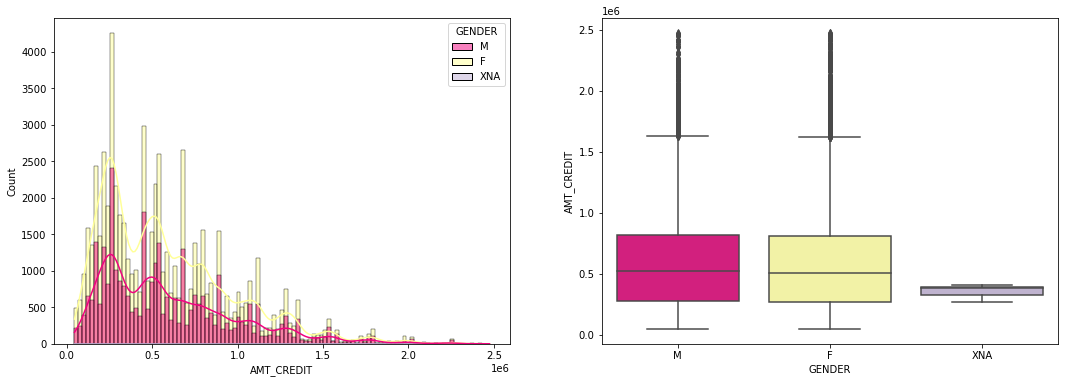

In [238]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_CREDIT'],hue=data['GENDER'],palette='Accent_r', ax = ax[0],kde=True) 
sns.boxplot(y = data['AMT_CREDIT'],x=data['GENDER'],palette='Accent_r', ax = ax[1])
plt.show()

The credit amount is same for both males and females which is around 500000

### GENDER WISE AMT_GOODS_PRICE

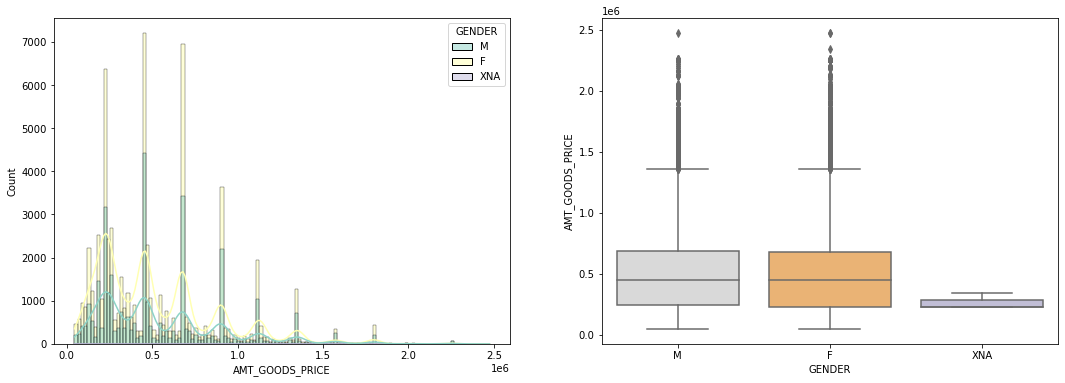

In [239]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_GOODS_PRICE'],hue=data['GENDER'],palette='Set3', ax = ax[0],kde=True) 
sns.boxplot(y = data['AMT_GOODS_PRICE'],x=data['GENDER'],palette='Set3_r', ax = ax[1])
plt.show()

The amount is same for both males and females which is around 500000

### GENDER WISE WORKING DAYS

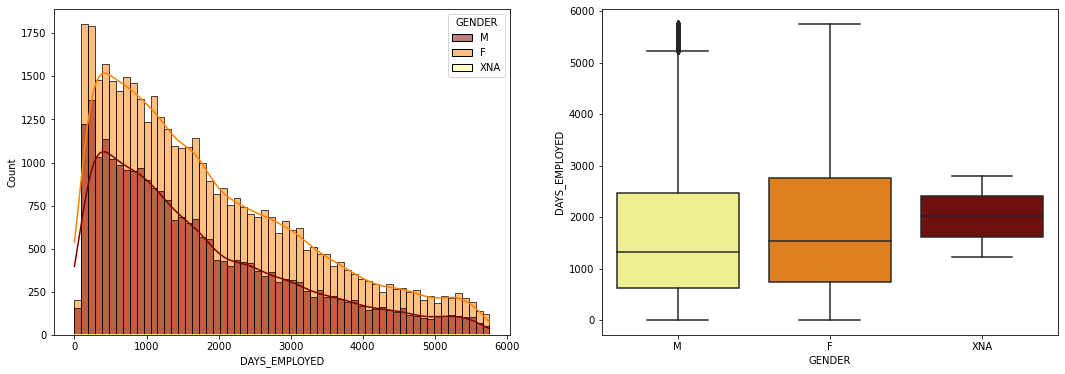

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = abs(data['DAYS_EMPLOYED']),hue=data['GENDER'],palette='afmhot', ax = ax[0],kde=True) 
sns.boxplot(y = abs(data['DAYS_EMPLOYED']),x=data['GENDER'],palette='afmhot_r', ax = ax[1])
plt.show()

females slightly worked more no of days than males

### TARGET WISE CONTRACT TYPE

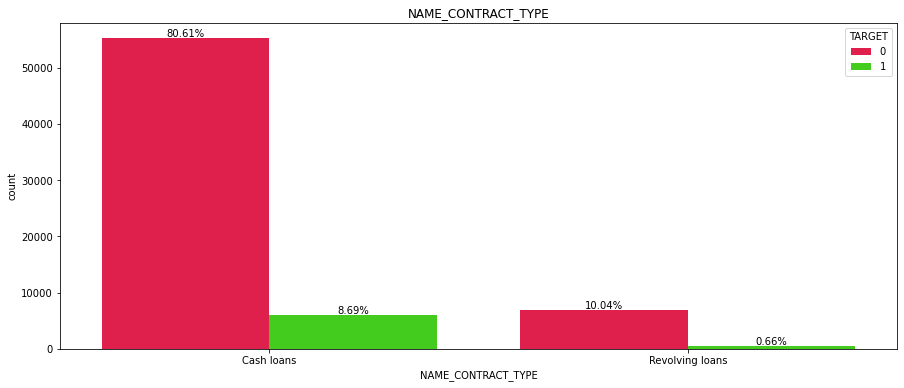

In [81]:
def bar_percentage(ax, count: "NAME_CONTRACT_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_CONTRACT_TYPE'].value_counts()
label=list(data['NAME_CONTRACT_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_CONTRACT_TYPE'],palette='prism_r',hue='TARGET',data=data,order=data['NAME_CONTRACT_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_CONTRACT_TYPE')
plt.show()

defaulters prefer cash loans

### TARGET WISE CAR

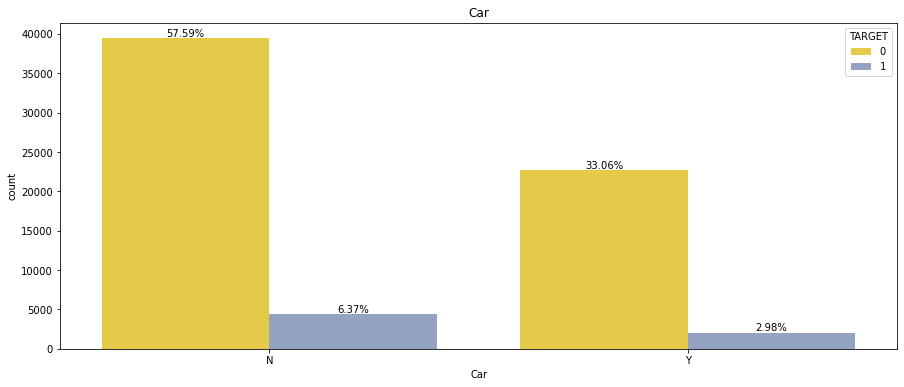

In [77]:
def bar_percentage(ax, count: "Car"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['Car'].value_counts()
label=list(data['Car'].value_counts().index)
sns.countplot(x = data['Car'],palette='Set2_r',hue='TARGET',data=data,order=data['Car'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('Car')
plt.show()

 6.37 % of the defaulters doesnt own a car

### TARGET WISE HOUSE

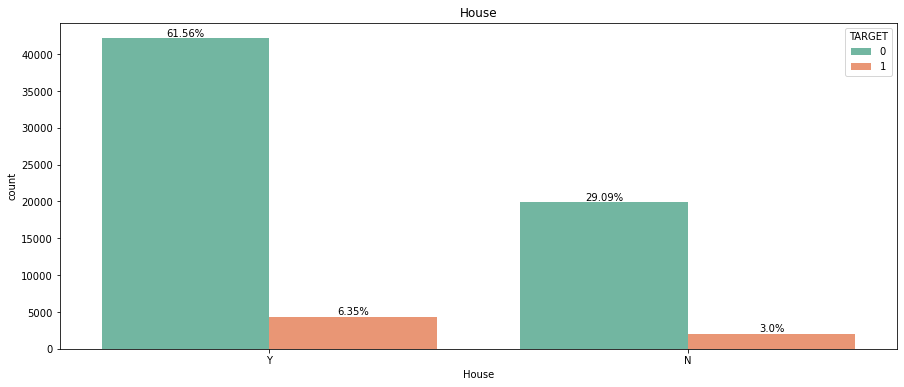

In [82]:
def bar_percentage(ax, count: "House"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['House'].value_counts()
label=list(data['House'].value_counts().index)
sns.countplot(x = data['House'],palette='Set2',hue='TARGET',data=data,order=data['House'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('House')
plt.show()

3 % of defaulters doesnt own a house

### TARGET WISE INCOME TYPE

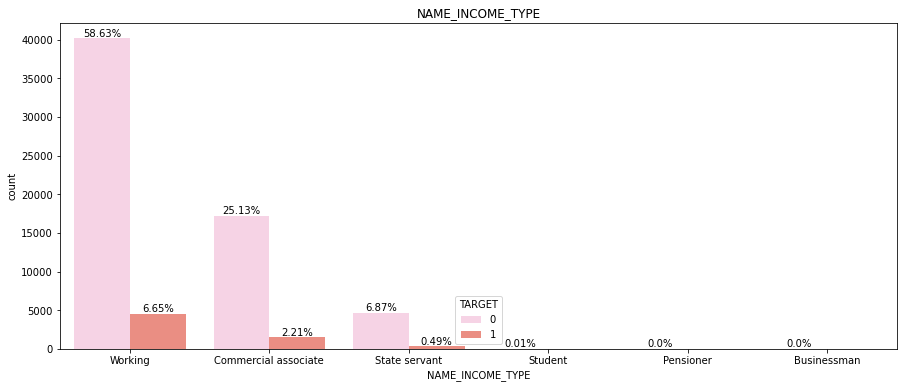

In [83]:
def bar_percentage(ax, count: "NAME_INCOME_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_INCOME_TYPE'].value_counts()
label=list(data['NAME_INCOME_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_INCOME_TYPE'],palette='Set3_r',hue='TARGET',data=data,order=data['NAME_INCOME_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_INCOME_TYPE')
plt.show()

majority of the defaulters are working class people

### TARGET WISE EDUCATION

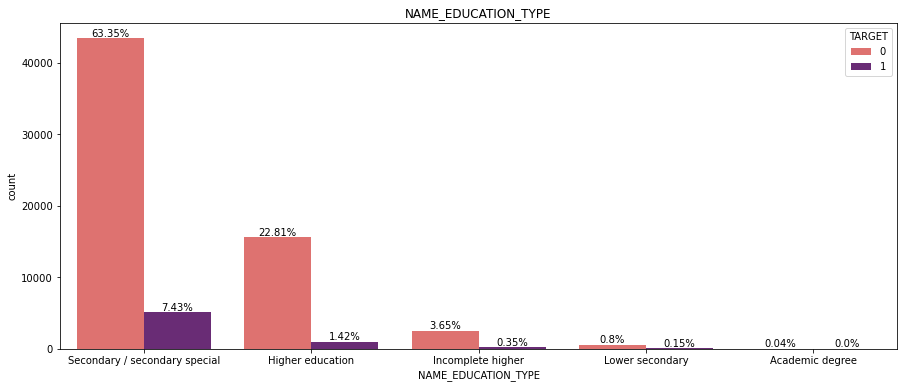

In [84]:
def bar_percentage(ax, count: "NAME_EDUCATION_TYPE"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_EDUCATION_TYPE'].value_counts()
label=list(data['NAME_EDUCATION_TYPE'].value_counts().index)
sns.countplot(x = data['NAME_EDUCATION_TYPE'],palette='magma_r',hue='TARGET',data=data,order=data['NAME_EDUCATION_TYPE'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_EDUCATION_TYPE')
plt.show()

majority of defaulters have atleast a secondary education

### TARGET WISE MARITAL STATUS

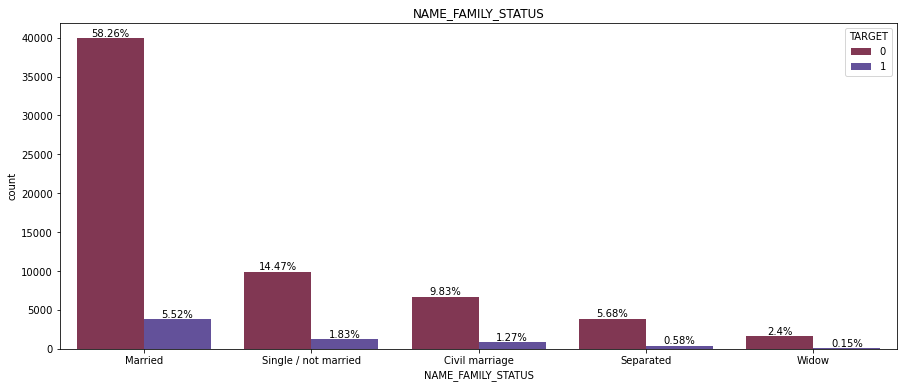

In [94]:
def bar_percentage(ax, count: "NAME_FAMILY_STATUS"):
     for bar in ax.patches:
            percentage = f"{round((bar.get_height() / count) *100, 2)}%"
            x = bar.get_x() + bar.get_width() /2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), va = "bottom", ha = "center")
fig, ax = plt.subplots(figsize = (15, 6))
at_count=data['NAME_FAMILY_STATUS'].value_counts()
label=list(data['NAME_FAMILY_STATUS'].value_counts().index)
sns.countplot(x = data['NAME_FAMILY_STATUS'],palette='twilight_r',hue='TARGET',data=data,order=data['NAME_FAMILY_STATUS'].value_counts().index)
bar_percentage(ax,len(data))
plt.title('NAME_FAMILY_STATUS')
plt.show()

majority of the defaulters are married

### TARGET WISE INCOME

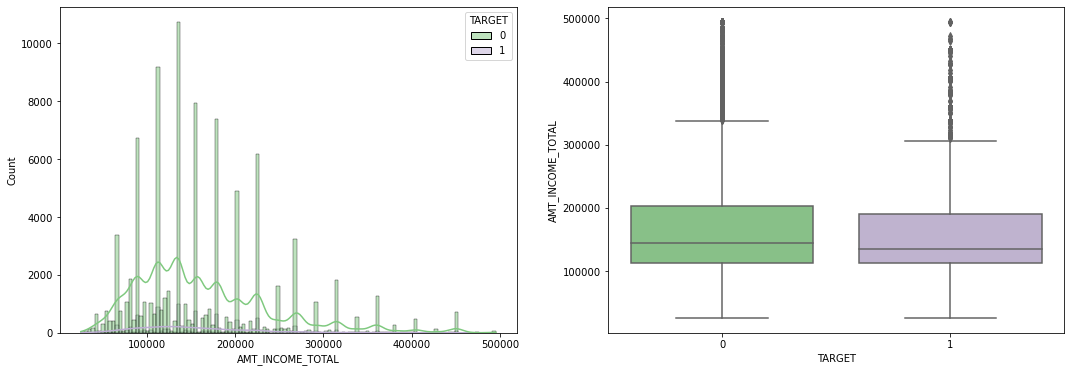

In [240]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_INCOME_TOTAL'],hue=data['TARGET'],palette='Accent', ax = ax[0],kde=True) 
sns.boxplot(y = data['AMT_INCOME_TOTAL'],x=data['TARGET'],palette='Accent', ax = ax[1])
plt.show()

Non defaulters have more range of income and defaulters income average is less 

### TARGET WISE CREDIT AMOUNT

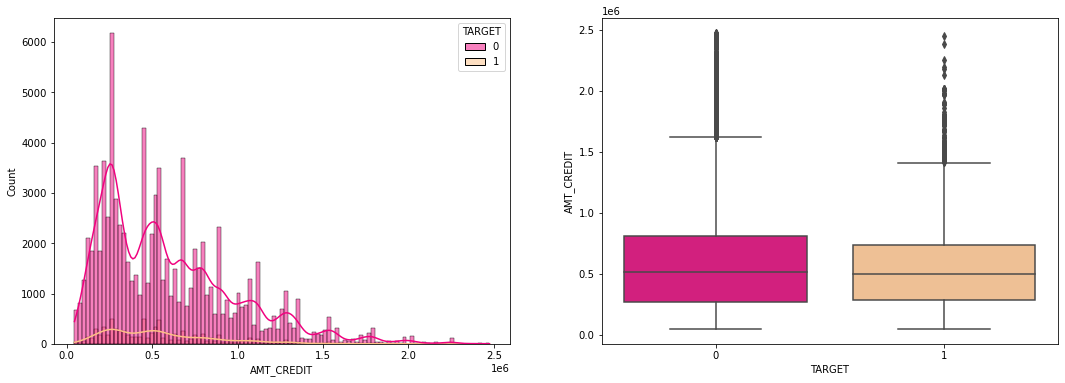

In [241]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_CREDIT'],hue=data['TARGET'],palette='Accent_r', ax = ax[0],kde=True) 
sns.boxplot(y = data['AMT_CREDIT'],x=data['TARGET'],palette='Accent_r', ax = ax[1])
plt.show()

Non defaulters have more range of loan amount 

### TARGET WISE AMT_GOOD_PRICE

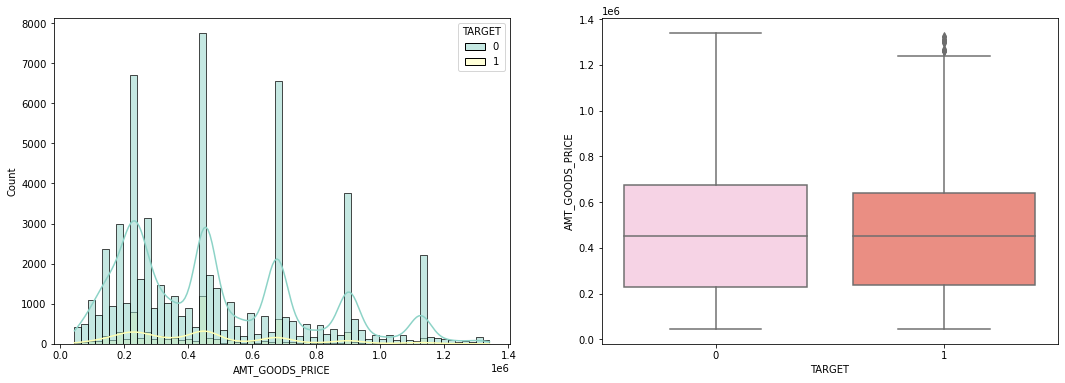

In [97]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = data['AMT_GOODS_PRICE'],hue=data['TARGET'],palette='Set3', ax = ax[0],kde=True) 
sns.boxplot(y = data['AMT_GOODS_PRICE'],x=data['TARGET'],palette='Set3_r', ax = ax[1])
plt.show()

There isnt much difference between defaulters and non defaulters in amount goods price

### TARGET WISE EMPLOYED DAYS

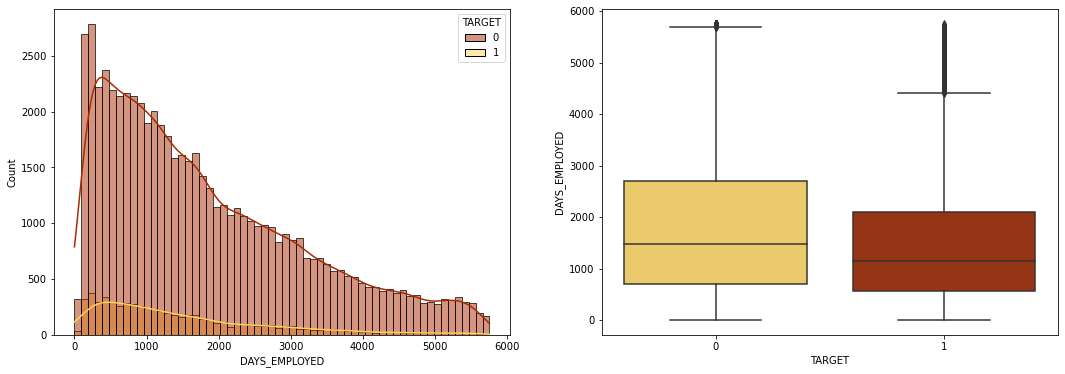

In [98]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = abs(data['DAYS_EMPLOYED']),hue=data['TARGET'],palette='afmhot', ax = ax[0],kde=True) 
sns.boxplot(y = abs(data['DAYS_EMPLOYED']),x=data['TARGET'],palette='afmhot_r', ax = ax[1])
plt.show()

Here we can see that defaulters have slightly less no of employed days when compared to non defaulters

### CORRELATION CHART

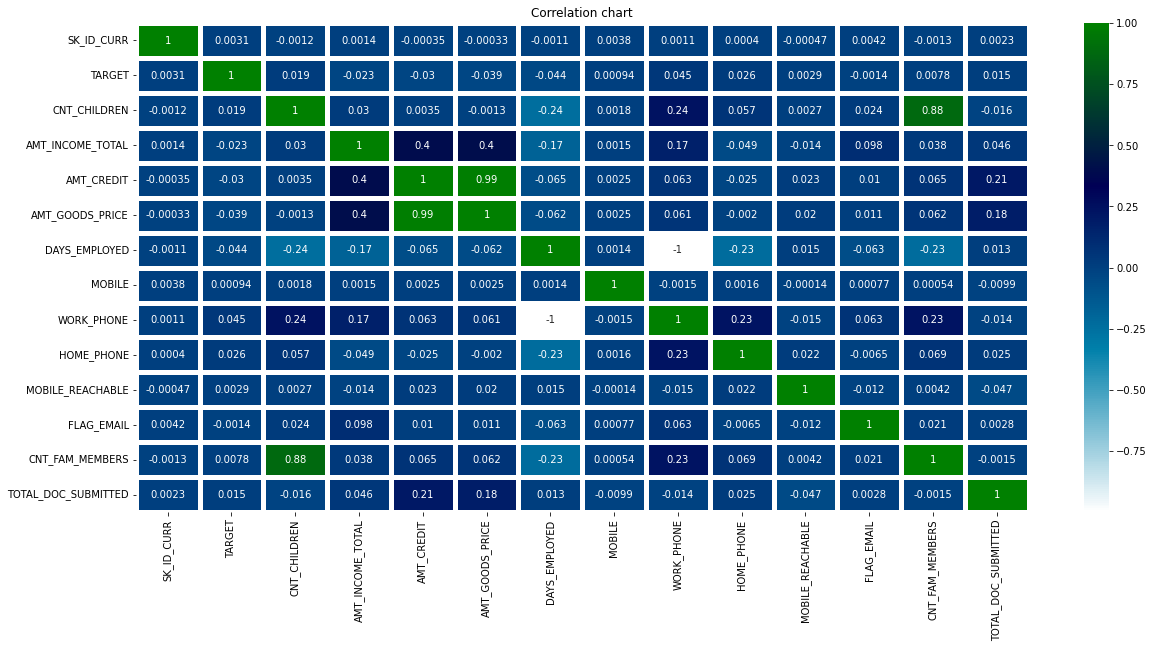

In [244]:
fig, ax=plt.subplots(figsize= (20,9))
sns.heatmap(data.corr(), cmap='ocean_r', annot=True, linewidth=5);
plt.title('Correlation chart')
plt.show()

On analysing the correlation chart, we can see that


1. target and days of employed has a positive correlation
2. target and mobile reachability has a positive correlation
3. target and doc submition has a positive correlation

So from this chart and previous analysis, we can decide that defaulters are more likely to be present who have less days of employement.

In [245]:
data['AMT_INCOME_TOTAL'].mean()

163131.2094353194

In [246]:
data['AMT_CREDIT'].mean()

592942.932800638

In [247]:
avg_data = data[(data['AMT_INCOME_TOTAL'] < 163131)]
abvavg_data = data[(data['AMT_INCOME_TOTAL'] > 163131)]

### INCOME FOR BELOW AVG

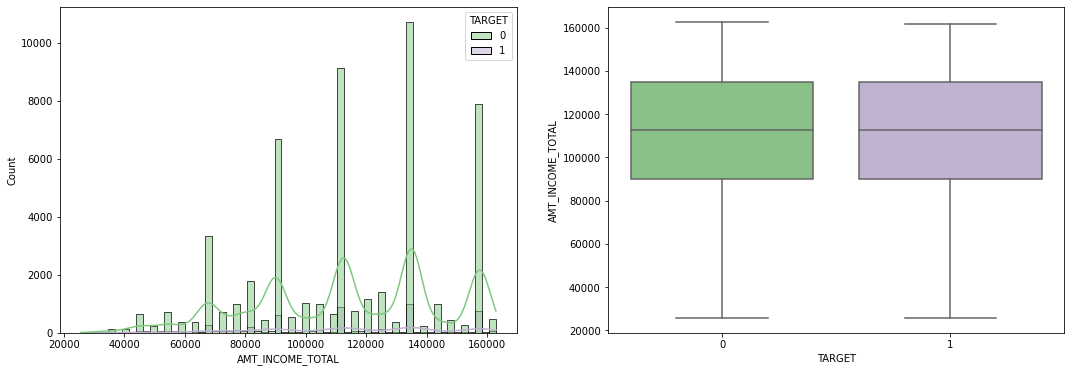

In [248]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = avg_data['AMT_INCOME_TOTAL'],hue=avg_data['TARGET'],palette='Accent', ax = ax[0],kde=True) 
sns.boxplot(y = avg_data['AMT_INCOME_TOTAL'],x=avg_data['TARGET'],palette='Accent', ax = ax[1])
plt.show()

No relation

### INCOME FOR ABV AVG

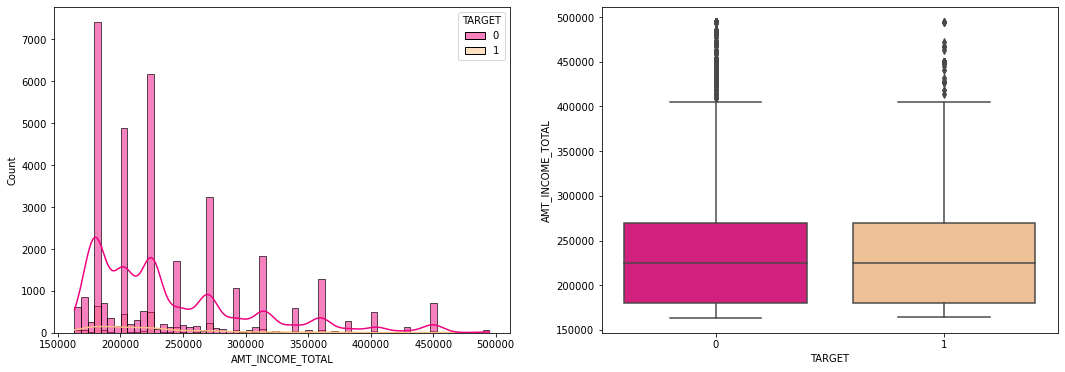

In [249]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = abvavg_data['AMT_INCOME_TOTAL'],hue=abvavg_data['TARGET'],palette='Accent_r', ax = ax[0],kde=True) 
sns.boxplot(y = abvavg_data['AMT_INCOME_TOTAL'],x=abvavg_data['TARGET'],palette='Accent_r', ax = ax[1])
plt.show()

No relation

### AMT_CREDIT FOR BELOW AVG

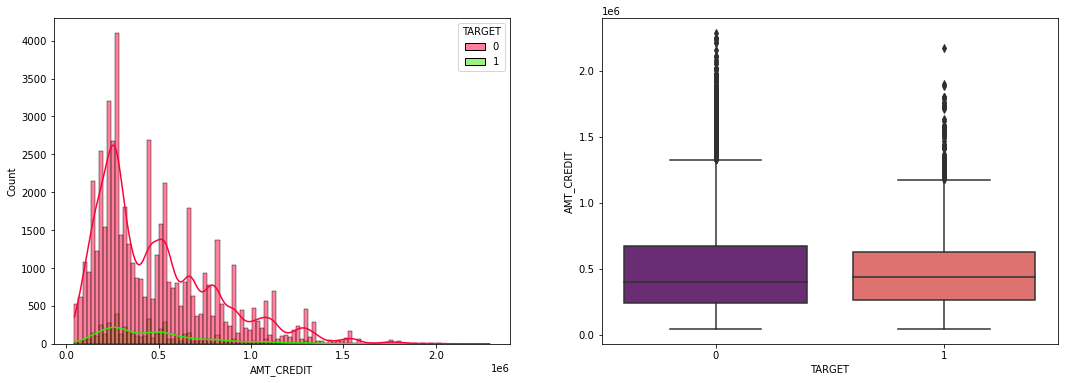

In [250]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = avg_data['AMT_CREDIT'],hue=avg_data['TARGET'],palette='prism_r', ax = ax[0],kde=True) 
sns.boxplot(y = avg_data['AMT_CREDIT'],x=avg_data['TARGET'],palette='magma', ax = ax[1])
plt.show()

loan amount applied for defaulters are slightly high

### AMT_CREDIT FOR ABV AVG

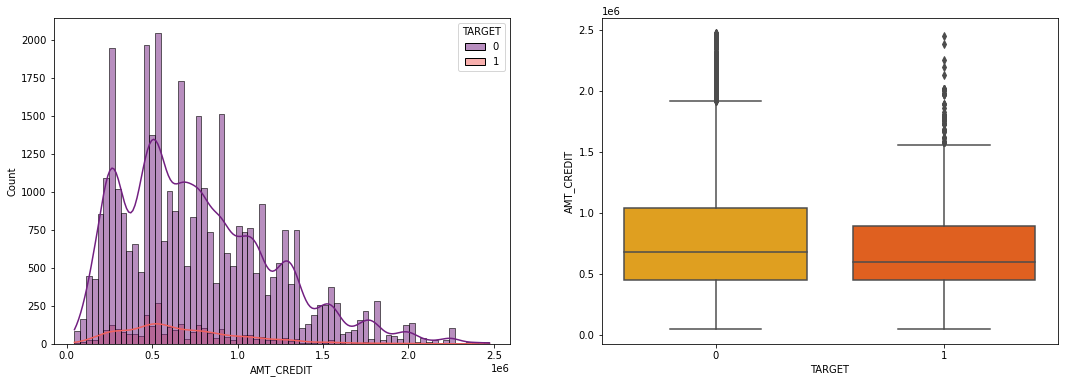

In [251]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = abvavg_data['AMT_CREDIT'],hue=abvavg_data['TARGET'],palette='magma', ax = ax[0],kde=True) 
sns.boxplot(y = abvavg_data['AMT_CREDIT'],x=abvavg_data['TARGET'],palette='autumn_r', ax = ax[1])
plt.show()

loan amount applied for defaulters are slightly low

## Possible applicants who can default

*** RISK PARAMETERS ***

This was considered for applicants who earn less than average income and have applied for loan more than average amount

MORE FACTORS INCLUDE,
1. NOT OWNING A HOUSE
2. LOWER SECONDARY EDUCATION
3. LOW SKILLED LABOURS
4. PROBABLY A FEMALE

In [265]:
def_df = data[(data['AMT_INCOME_TOTAL'] < 163131)&(data['AMT_CREDIT'] > 592942)]
def_df 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,-679,1,1,0,1,0,Core staff,3.0,SATURDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,-2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
34,100040,0,Cash loans,F,N,Y,0,135000.0,1125000.0,1125000.0,...,-4585,1,1,0,1,0,Core staff,2.0,FRIDAY,1
43,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,675000.0,...,365243,1,0,0,1,0,NaN,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,216070,0,Revolving loans,F,N,Y,2,135000.0,810000.0,810000.0,...,-3253,1,1,0,1,0,Laborers,4.0,FRIDAY,0
99987,216078,0,Cash loans,M,N,N,1,135000.0,640080.0,450000.0,...,-3468,1,1,0,1,0,NaN,2.0,FRIDAY,1
99988,216079,0,Cash loans,M,N,Y,2,135000.0,974794.5,841500.0,...,-315,1,1,0,1,0,Laborers,4.0,FRIDAY,1
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1


### Applicants who have defaulted before (meeting risk parameters)

In [253]:
def_df2=def_df[(def_df['TARGET']==1)]
def_df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,-2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,585000.0,...,-267,1,1,0,1,0,Sales staff,2.0,SUNDAY,1
235,100273,1,Cash loans,F,N,Y,0,157500.0,1710000.0,1710000.0,...,-9274,1,1,0,1,0,Medicine staff,2.0,WEDNESDAY,0
424,100490,1,Cash loans,M,N,N,0,135000.0,755190.0,675000.0,...,-2354,1,1,1,1,0,Security staff,1.0,WEDNESDAY,1
564,100650,1,Cash loans,M,N,N,0,135000.0,808650.0,675000.0,...,-1496,1,1,1,1,0,Low-skill Laborers,1.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99500,215514,1,Cash loans,F,N,Y,0,67500.0,1093500.0,1093500.0,...,365243,1,0,0,1,0,NaN,2.0,FRIDAY,0
99502,215517,1,Cash loans,M,N,N,0,135000.0,770913.0,643500.0,...,-1028,1,1,1,1,0,Laborers,2.0,SATURDAY,1
99507,215522,1,Cash loans,M,N,Y,0,112500.0,900000.0,900000.0,...,-1402,1,1,0,1,0,Laborers,2.0,FRIDAY,1
99619,215659,1,Cash loans,M,N,Y,1,135000.0,900000.0,900000.0,...,-1049,1,1,0,0,1,Laborers,3.0,MONDAY,1


### POSSIBLE RED FLAG CUSTOMERS WHO HAVE DEFAULTED BEFORE

*** RED FLAG ***

RED FLAG criterias where considered from the observations made in the income category from general observations below.

##### Customers with no mobile reachability

In [254]:
def_df3=def_df2[(def_df2['MOBILE_REACHABLE']==0)]
def_df3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99619,215659,1,Cash loans,M,N,Y,1,135000.0,900000.0,900000.0,...,-1049,1,1,0,0,1,Laborers,3.0,MONDAY,1


##### Customers who have a OCCUPATION_TYPE of Low-skill Laborers

In [268]:
def_df6=def_df2[(def_df2['OCCUPATION_TYPE']=='Low-skill Laborers')]
def_df6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
564,100650,1,Cash loans,M,N,N,0,135000.0,808650.0,675000.0,...,-1496,1,1,1,1,0,Low-skill Laborers,1.0,SATURDAY,1
2042,102392,1,Cash loans,M,N,N,0,67500.0,808650.0,675000.0,...,-2576,1,1,0,1,0,Low-skill Laborers,2.0,SATURDAY,1
5101,105958,1,Cash loans,M,Y,Y,1,157500.0,1024740.0,900000.0,...,-961,1,1,0,1,0,Low-skill Laborers,3.0,MONDAY,1
6843,107979,1,Cash loans,F,N,Y,2,67500.0,734994.0,526500.0,...,-928,1,1,0,1,0,Low-skill Laborers,4.0,SATURDAY,1
12752,114868,1,Cash loans,M,N,Y,2,67500.0,729792.0,630000.0,...,-752,1,1,1,1,0,Low-skill Laborers,4.0,SUNDAY,1
15836,118477,1,Cash loans,F,N,N,1,157500.0,835380.0,675000.0,...,-1596,1,1,0,1,0,Low-skill Laborers,3.0,TUESDAY,1
23076,126854,1,Cash loans,F,N,Y,2,135000.0,948730.5,819000.0,...,-3687,1,1,0,1,0,Low-skill Laborers,4.0,TUESDAY,1
23508,127354,1,Cash loans,F,N,Y,2,90000.0,630000.0,630000.0,...,-2962,1,1,0,1,0,Low-skill Laborers,4.0,MONDAY,1
30869,135833,1,Cash loans,M,N,Y,0,67500.0,808650.0,675000.0,...,-1609,1,1,0,1,0,Low-skill Laborers,1.0,MONDAY,1
31549,136595,1,Cash loans,M,Y,Y,1,148500.0,1078200.0,900000.0,...,-225,1,1,0,1,0,Low-skill Laborers,3.0,SUNDAY,1


##### Customers who have a education level of lower secondary

In [274]:
def_df6=def_df2[(def_df2['NAME_EDUCATION_TYPE']=='Lower secondary')]
def_df6

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
2385,102789,1,Cash loans,F,N,Y,0,90000.0,593010.0,495000.0,...,-2022,1,1,0,1,0,Cooking staff,2.0,TUESDAY,1
3431,104006,1,Cash loans,M,Y,N,0,90000.0,640080.0,450000.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
9349,110870,1,Cash loans,F,N,Y,0,126000.0,835380.0,675000.0,...,365243,1,0,0,1,0,NaN,1.0,TUESDAY,1
14642,117084,1,Cash loans,F,N,N,0,112500.0,1078200.0,900000.0,...,-1881,1,1,1,1,0,Core staff,1.0,MONDAY,1
15836,118477,1,Cash loans,F,N,N,1,157500.0,835380.0,675000.0,...,-1596,1,1,0,1,0,Low-skill Laborers,3.0,TUESDAY,1
17583,120505,1,Cash loans,M,Y,N,0,135000.0,724981.5,648000.0,...,-2790,1,1,0,1,0,NaN,2.0,WEDNESDAY,1
18416,121480,1,Cash loans,M,Y,Y,0,157500.0,675000.0,675000.0,...,-430,1,1,0,1,0,Security staff,2.0,TUESDAY,1
22371,126038,1,Cash loans,F,N,Y,1,112500.0,601470.0,450000.0,...,-2420,1,1,0,1,1,NaN,3.0,SATURDAY,1
22689,126400,1,Cash loans,F,Y,N,0,135000.0,675000.0,675000.0,...,-5216,1,1,0,1,0,Laborers,2.0,TUESDAY,1
23505,127351,1,Cash loans,F,N,Y,0,67500.0,942300.0,675000.0,...,365243,1,0,0,1,0,NaN,1.0,TUESDAY,1


### Applicants who have not defaulted before but meeting the risk parameters

In [266]:
def_df5=def_df[(def_df['TARGET']==0)]
def_df5

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,-679,1,1,0,1,0,Core staff,3.0,SATURDAY,1
34,100040,0,Cash loans,F,N,Y,0,135000.0,1125000.0,1125000.0,...,-4585,1,1,0,1,0,Core staff,2.0,FRIDAY,1
43,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,675000.0,...,365243,1,0,0,1,0,NaN,1.0,WEDNESDAY,1
48,100055,0,Cash loans,F,N,N,0,130500.0,1350000.0,1350000.0,...,-4411,1,1,1,1,0,Managers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,216070,0,Revolving loans,F,N,Y,2,135000.0,810000.0,810000.0,...,-3253,1,1,0,1,0,Laborers,4.0,FRIDAY,0
99987,216078,0,Cash loans,M,N,N,1,135000.0,640080.0,450000.0,...,-3468,1,1,0,1,0,NaN,2.0,FRIDAY,1
99988,216079,0,Cash loans,M,N,Y,2,135000.0,974794.5,841500.0,...,-315,1,1,0,1,0,Laborers,4.0,FRIDAY,1
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1


### COMPARING THE DEFAULTERS WHO EARN LESS THAN BELOW AVERAGE WITH NON DEFAULTERS

### COMPARISSION OF LOAN AMOUNT

In [ ]:
data1=data[(data['TARGET']==0)]

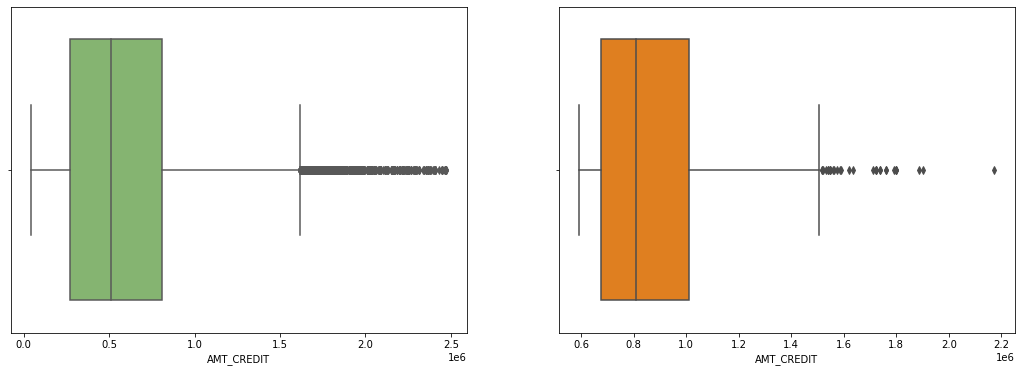

In [256]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.boxplot(x = data1['AMT_CREDIT'],palette='summer', ax = ax[0]) 
sns.boxplot(x = def_df2['AMT_CREDIT'],palette='autumn_r', ax = ax[1])
plt.show()

here we can clearly see that loan amount was near 8 lakhs while non defaulters is around 5 lakhs

### COMPARISSION OF INCOME

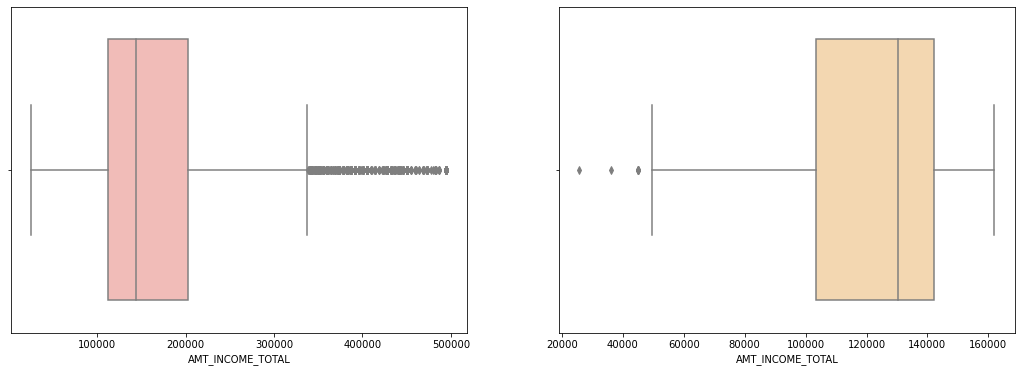

In [257]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.boxplot(x = data1['AMT_INCOME_TOTAL'],palette='Pastel1', ax = ax[0]) 
sns.boxplot(x = def_df2['AMT_INCOME_TOTAL'],palette='Pastel1_r', ax = ax[1])
plt.show()

we can clearly see there is a difference in income between defaulters and non defaulters

### CONCLUSION

So we can conclude that customers who are defaulters in past and earn less than average income (157070) but applied for a loan amount higher than average (540735) are more likely to become a defaulter

### GENERAL OBSERVATIONS

### FAMILY SIZE

In [258]:
data_f=data[(data['CNT_FAM_MEMBERS']<6)&(data['GENDER']!='XNA')]
p1=pd.pivot_table(data_f,index='GENDER',columns='CNT_FAM_MEMBERS',values='AMT_INCOME_TOTAL',aggfunc='mean')
p1

CNT_FAM_MEMBERS,1.0,2.0,3.0,4.0,5.0
GENDER,,,,,
F,151430.059292,152869.808852,152484.440278,144776.387311,146022.153734
M,174167.177235,183652.268225,192435.620251,196373.042563,199375.460784


<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='GENDER'>

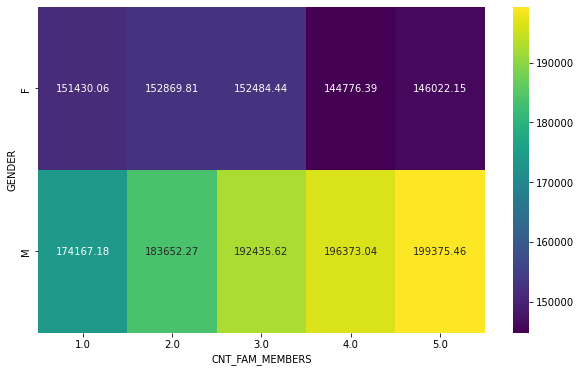

In [259]:
plt.figure(figsize=(10,6))
sns.heatmap(p1,annot=True,fmt='.2f',cmap='viridis')

### HOUSE

In [260]:
data_h=data[(data['GENDER']!='XNA')]
p2=pd.pivot_table(data_h,index='House',columns='GENDER',values='AMT_INCOME_TOTAL',aggfunc='mean')
p2

GENDER,F,M
House,,
N,148958.464544,185196.982158
Y,152978.404864,185164.148025


<AxesSubplot:xlabel='GENDER', ylabel='House'>

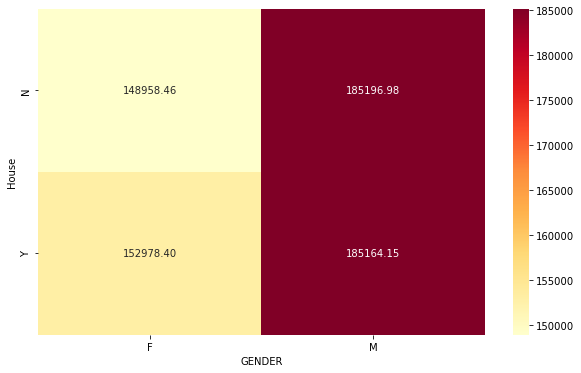

In [261]:
plt.figure(figsize=(10,6))
sns.heatmap(p2,annot=True,fmt='.2f',cmap='YlOrRd')

### CAR

In [262]:
data_c=data[(data['GENDER']!='XNA')]
p3=pd.pivot_table(data_h,index='Car',columns='GENDER',values='AMT_INCOME_TOTAL',aggfunc='mean')
p3

GENDER,F,M
Car,,
N,145937.034159,169796.652517
Y,172637.045578,197011.806785


<AxesSubplot:xlabel='GENDER', ylabel='Car'>

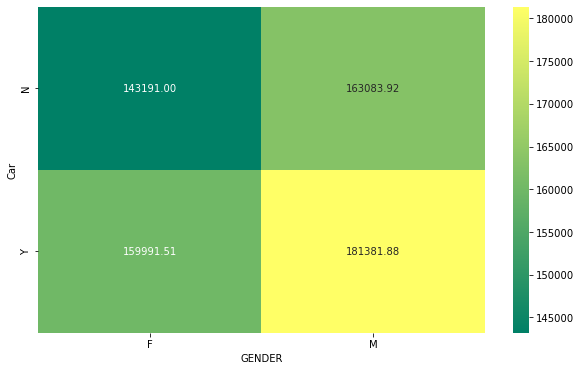

In [210]:
plt.figure(figsize=(10,6))
sns.heatmap(p3,annot=True,fmt='.2f',cmap='summer')

### COMPARING INCOME CATEGORY FOR DEGREE HOLDERS

In [263]:
data_i=data[(data['GENDER']!='XNA')]
p4=pd.pivot_table(data_i,index='NAME_EDUCATION_TYPE',columns='GENDER',values='AMT_INCOME_TOTAL',aggfunc='mean')
p4

GENDER,F,M
NAME_EDUCATION_TYPE,,
Academic degree,200671.875000,222750.000000
Higher education,181577.318186,222556.401078
Incomplete higher,160036.132715,198962.461165
Lower secondary,116643.230615,145999.244060
Secondary / secondary special,141650.416806,173426.644876


<AxesSubplot:xlabel='GENDER', ylabel='NAME_EDUCATION_TYPE'>

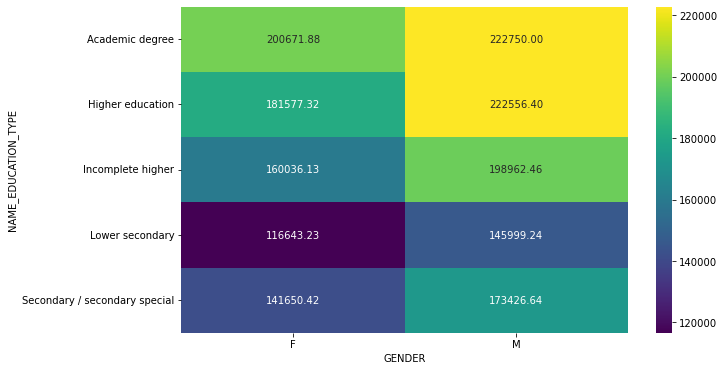

In [264]:
plt.figure(figsize=(10,6))
sns.heatmap(p4,annot=True,fmt='.2f',cmap='viridis')

### COMPARING INCOME CATEGORY FOR OCCUPATION_TYPE

In [272]:
data_o=data[(data['GENDER']!='XNA')]
p5=pd.pivot_table(data_o,index='OCCUPATION_TYPE',columns='GENDER',values='AMT_INCOME_TOTAL',aggfunc='mean')
p5

GENDER,F,M
OCCUPATION_TYPE,,
Accountants,184770.204873,195800.561798
Cleaning staff,128892.139685,134119.736842
Cooking staff,132319.445793,184279.352459
Core staff,159161.441932,201878.107843
Drivers,163873.449664,185803.997731
HR staff,168558.150888,253665.000000
High skill tech staff,160772.192010,210782.447839
IT staff,156193.269231,216664.407080
Laborers,144550.312822,175592.152854


<AxesSubplot:xlabel='GENDER', ylabel='OCCUPATION_TYPE'>

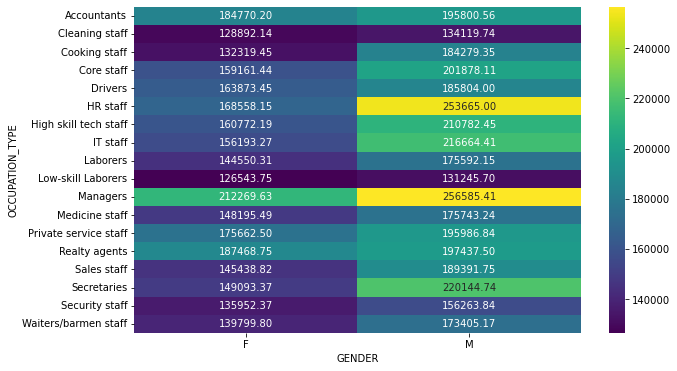

In [273]:
plt.figure(figsize=(10,6))
sns.heatmap(p5,annot=True,fmt='.2f',cmap='viridis')